Classification vanilla

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
import sklearn

from tqdm import tqdm

from sklearn.neural_network._base import log_loss as log_loss_sk

In [ ]:
def init(X):
   W = np.random.randn(X.shape[1],1)
   b = np.random.randn(1)
   return(W, b)

In [ ]:
def model(X, W, b):
  Z = X.dot(W) + b
  A = 1 / (1 + np.exp(-Z))
  return A

In [ ]:
def log_loss(A, y):
  eps = 1e-15
  return 1/len(y)*np.sum(-y*np.log(A+eps)-(1-y)* np.log(1-A+eps))

In [ ]:
def gradients(A, X, y):
  dW = 1/len(y)* np.dot(X.T, A - y)
  db = 1/len(y)* np.sum(A - y)
  return (dW, db)

In [ ]:
def update(dW, db, W, b, learning_rate):
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return W, b

In [ ]:
def prediction(x, W, b):
  A = model(x, W, b)
  return A >= 0.5

In [ ]:
def random_neuron(x_train, y_train, learning_rate = 0.1, generation = 100):
  #initialisation de W et b 
  W, b = init(x_train)

  train_Loss = []
  train_accu = []

  test_Loss = []
  test_accu = []

  for i in tqdm(range(generation)):
    A = model(x_train, W, b)
    if i % 10 == 0: 
      #train
      train_Loss.append(log_loss(A, y_train))
      y_pred = prediction(x_train, W, b)
      train_accu.append(accuracy_score(y_train, y_pred))

      #test 
      #A_test = model(x_test, W, b)
      #test_Loss.append(log_loss(A_test, y_test))
      #y_pred = prediction(x_test, W, b)
      #test_accu.append(accuracy_score(y_test, y_pred))

    #mise a jour
    dW, db = gradients(A, x_train, y_train)
    W, b = update(dW, db, W, b, learning_rate)

  returns = {
      'loss': train_Loss,
      'accu': train_accu,
      't_loss': test_Loss,
      't_accu': test_accu,
      'W': W,
      'b': b
  }

  return returns
  

dimensions de X (150, 2)
dimensions de Y (150, 1)


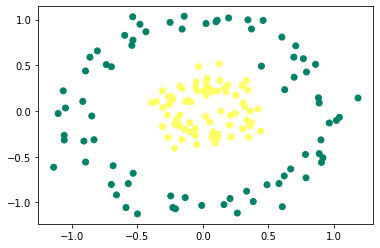

In [ ]:
#X, y = make_blobs(n_samples=150,centers=2, random_state=0)
X, y = make_circles(n_samples=150, noise=0.1, factor=0.3, random_state=0)

y = y.reshape((y.shape[0],1))

print('dimensions de X', X.shape)
print('dimensions de Y', y.shape)

plt.scatter(X[:,0],X[:,1], c=y, cmap='summer')
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 13504.53it/s]


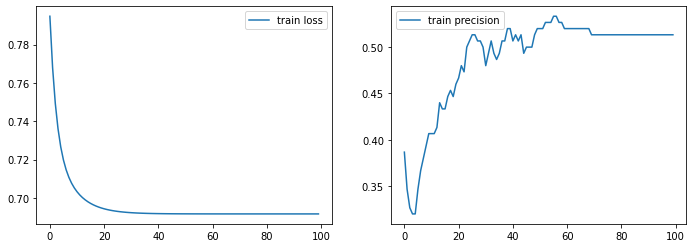

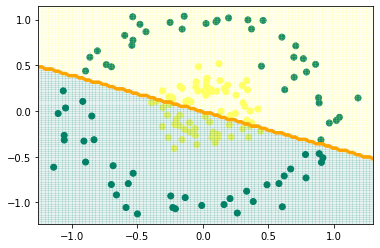

In [ ]:
returns = random_neuron(X,y, generation = 1000)

#print(returns['W'])
#print(returns['b'])

plt.figure(figsize=(18,4))


plt.subplot(1,3,1)
plt.plot(returns['loss'], label="train loss")
#plt.plot(t_loss, label="test loss")
plt.legend()

plt.subplot(1,3,2)
plt.plot(returns['accu'], label="train precision")
#plt.plot(t_accu, label="test precision")
plt.legend()

fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1], c=y, cmap='summer')

x0_lim = ax.get_xlim()
x1_lim = ax.get_ylim()

reso = 100

x0 = np.linspace(x0_lim[0], x0_lim[1], reso)
x1 = np.linspace(x1_lim[0], x1_lim[1], reso)

X0, X1 = np.meshgrid(x0,x1)
XX = np.vstack((X0.ravel(),X1.ravel())).T

Z = prediction(XX,returns['W'],returns['b'])
Z = Z.reshape((reso,reso))

ax.pcolormesh(X0,X1,Z,cmap='summer',alpha=0.1)
ax.contour(X0,X1,Z,colors='orange')

plt.savefig('overfit.png')
plt.show()